# 🧠 Telco Customer Churn — Midterm Exam Assignment

Este cuaderno desarrolla un pipeline completo y avanzado de *Machine Learning* aplicado al problema de **churn en clientes del sector telecomunicaciones**, utilizando el dataset *Telco Customer Churn*. El objetivo es identificar patrones que permitan anticipar la deserción de clientes y construir un modelo predictivo de alto desempeño basado en redes neuronales profundas y técnicas modernas de optimización.

---

## 🎯 Alcance del trabajo

El desarrollo incluye:

1) **Inspección y Análisis Exploratorio (EDA)**
   - Tipificación de variables (numéricas / categóricas)
   - Manejo de valores faltantes y outliers
   - Análisis de distribución y relaciones con la variable objetivo *(Churn)*

2) **Transformación y Preparación**
   - *One-Hot Encoding* y escalamiento mediante **pipelines**
   - División estratificada Train/Test
   - Preparación del dataset para Deep Learning

3) **Selección de Características**
   - Importancia de variables con **Random Forest** y/o **L1 Regularization**
   - Justificación de reducción dimensional

4) **Modelado con Redes Neuronales**
   - Arquitectura base en **Keras**
   - Diseño para clasificación binaria

5) **Optimización Avanzada de Hiperparámetros**
   - **Hyperband**, **Optimización Bayesiana** y/o **Algoritmos Genéticos**
   - Búsqueda sobre capas, neuronas, activaciones, tasa de aprendizaje y regularización

6) **Evaluación y Comparación**
   - Métricas: *Accuracy, F1-score, AUC*
   - Comparativa: **modelo base vs modelo optimizado vs Stacking**
   - Discusión del impacto de la selección de features

7) **Síntesis de Hallazgos**
   - Extracto ejecutivo en diapositiva de fondo blanco
   - Conclusiones técnicas y líneas de mejora

---

## 📌 Entrega y Contexto

Este trabajo corresponde al **Midterm Exam**, con defensa oral y revisión del notebook como evidencia técnica. La presentación deberá cubrir Problem Statement, Metodología, EDA, Resultados y Conclusiones en un tiempo de 10–15 minutos.

---


### 📦 Sobre el dataset (Telco Customer Churn — Kaggle)

El dataset contiene información detallada de clientes de una compañía de telecomunicaciones en EE.UU., incluyendo datos demográficos, tipo de contrato, método de pago, cargos facturados y si el cliente abandonó el servicio (*churn*). Fue diseñado con fines analíticos para estudiar los factores que influyen en la deserción de clientes.

**Qué contiene:**
- **Demografía:** género, ciudad, estado, ubicación geográfica.
- **Plan y facturación:** tipo de contrato, método de pago, cargo mensual y total acumulado.
- **Churn:** etiqueta binaria (Yes/No), razones de churn y CLTV (valor del cliente en el tiempo).
- **Motivos de abandono:** mejor oferta de competidor, mala experiencia, mudanza, etc.

**Usos típicos del dataset:**
- Predicción de churn mediante ML o Deep Learning.
- Segmentación de clientes por comportamiento o riesgo.
- Análisis de causas para diseñar estrategias de retención.

Es un dataset sintético, público y ampliamente usado en investigación y educación.

# 🧱 1.- EDA

## Carga y exploración inicial del dataset
- Descarga el dataset desde **Telco Customer Churn Dataset**.
- Realiza una inspección inicial del dataset:


In [140]:
import pandas as pd
import numpy as np
import missingno as msno

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# In order to correctly display plotly images in kaggle
import plotly.io as pio
pio.renderers.default = "png"
# Utilities
import warnings
from IPython.display import display, Markdown

warnings.filterwarnings("ignore")

# Global display settings
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(8,5))
plt.rcParams["figure.figsize"] = (10, 5)

<Figure size 800x500 with 0 Axes>

In [141]:
import pandas as pd

df = pd.read_csv("/Users/usr-s3c/Documents/Maestria_YTech/Redes-Neuronales/MidTerm/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Inspección Inicial del Dataset

In [142]:
df.shape

(7043, 21)

In [143]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [144]:
df.describe(include="all")

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7043          7043            7043           7043  ...   
unique            2             3               3              3  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6361          3390            3096           3498  ...   
mean            NaN           NaN             NaN            NaN  ...   
std             NaN           NaN             NaN            NaN  ...   
min             NaN           NaN             NaN            NaN  ...   
25%             NaN           NaN             NaN            NaN  ...   
50%             NaN           NaN             NaN            NaN  ...   
75%             NaN           NaN             NaN            NaN  ...   
max             NaN           NaN             NaN            NaN  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7043             7043              7043    7043.000000   
unique               3                2                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4171              2365            NaN   
mean               NaN              NaN               NaN      64.761692   
std                NaN              NaN               NaN      30.090047   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.500000   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.850000   
max                NaN              NaN               NaN     118.750000   

        TotalCharges Churn  
count           7043  7043  
unique          6531     2  
top                     No  
freq              11  5174  
mean             NaN   NaN  
std              NaN   NaN  
min              NaN   NaN  
25%              NaN   NaN  
50%              NaN   NaN  
75%              NaN   NaN  
max              NaN   NaN  

[11 rows x 21 columns]

In [145]:
df.select_dtypes(include=['object']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [146]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Identifica las columnas categóricas y numéricas.

In [147]:
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Columnas categóricas:", variables_categoricas)
print("Columnas numéricas:", variables_numericas)

Columnas categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Columnas numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [148]:
for i in variables_categoricas:
    print(f'Valores unicos de {i}: {df[i].unique()}, .Cantidad de valores unicos: {df[i].unique().shape[0]}')

Valores unicos de customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'], .Cantidad de valores unicos: 7043
Valores unicos de gender: ['Female' 'Male'], .Cantidad de valores unicos: 2
Valores unicos de Partner: ['Yes' 'No'], .Cantidad de valores unicos: 2
Valores unicos de Dependents: ['No' 'Yes'], .Cantidad de valores unicos: 2
Valores unicos de PhoneService: ['No' 'Yes'], .Cantidad de valores unicos: 2
Valores unicos de MultipleLines: ['No phone service' 'No' 'Yes'], .Cantidad de valores unicos: 3
Valores unicos de InternetService: ['DSL' 'Fiber optic' 'No'], .Cantidad de valores unicos: 3
Valores unicos de OnlineSecurity: ['No' 'Yes' 'No internet service'], .Cantidad de valores unicos: 3
Valores unicos de OnlineBackup: ['Yes' 'No' 'No internet service'], .Cantidad de valores unicos: 3
Valores unicos de DeviceProtection: ['No' 'Yes' 'No internet service'], .Cantidad de valores unicos: 3
Valores unicos de TechSupport: ['No' 'Yes' 'No internet 

In [149]:
for i in variables_numericas:
    print(f'Cantidad de valores unicos en {i}: {df[i].unique().shape[0]}')
 

Cantidad de valores unicos en SeniorCitizen: 2
Cantidad de valores unicos en tenure: 73
Cantidad de valores unicos en MonthlyCharges: 1585


## Verifica valores faltantes o atípicos y describe cómo los manejarás.
### Encontrar los valoes Nulos

In [150]:
df = df.drop('customerID', axis=1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [152]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

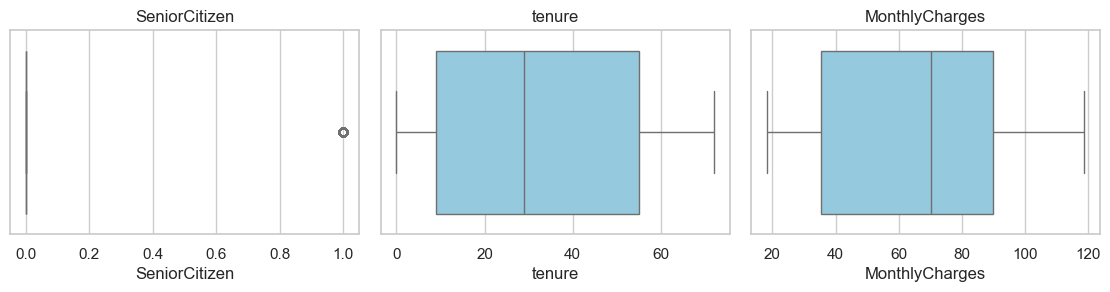

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i, col in enumerate(variables_numericas, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

## Eliminación de observaciones con valores faltantes en 'TotalCharges' y conversión a numérico

In [154]:
# Mostrar cuántos valores nulos hay antes
print("Valores nulos antes de limpiar:")
print(df.isnull().sum())

# Eliminar las filas que tienen NaN en la columna TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Confirmar que se eliminaron
print("\nValores nulos después de limpiar:")
print(df.isnull().sum())

# Mostrar la nueva dimensión del dataset
print("\nDimensión final del dataset:", df.shape)

Valores nulos antes de limpiar:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Valores nulos después de limpiar:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dimens

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [156]:
def detectar_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[variable] < (Q1 - 1.5 * IQR)) | (df[variable] > (Q3 + 1.5 * IQR))]
 

for i in variables_numericas:
    print(f'Cantidad de outliers en {i}: {len(detectar_outliers(df, i))}')

Cantidad de outliers en SeniorCitizen: 1142
Cantidad de outliers en tenure: 0
Cantidad de outliers en MonthlyCharges: 0


## Valores ünicos

In [157]:
df['SeniorCitizen'].unique()

array([0, 1])

In [158]:
# Contar valores únicos en SeniorCitizen
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

### 🧩 Análisis de Outliers en `SeniorCitizen`

La variable `SeniorCitizen` representa si el cliente es considerado un ciudadano senior o no, donde:

| Valor | Significado |
|:------:|-------------|
| 0 | Cliente **no senior** (menor de 65 años) |
| 1 | Cliente **senior** (65 años o más) |

Dado que se trata de una **variable categórica binaria**, sus valores posibles solo pueden ser `0` o `1`.  
Por esta razón, no deberían existir *outliers* reales, ya que no hay un rango continuo de valores.

#### 🔎 Verificación de valores únicos
Se realizó un conteo de valores para confirmar que no existan registros fuera del rango esperado:

```python
df['SeniorCitizen'].value_counts()

## Realiza un análisis estadístico básico para entender las distribuciones de las variables.

In [159]:
df.describe(include="all")

gender  SeniorCitizen Partner Dependents       tenure PhoneService  \
count    7032    7032.000000    7032       7032  7032.000000         7032   
unique      2            NaN       2          2          NaN            2   
top      Male            NaN      No         No          NaN          Yes   
freq     3549            NaN    3639       4933          NaN         6352   
mean      NaN       0.162400     NaN        NaN    32.421786          NaN   
std       NaN       0.368844     NaN        NaN    24.545260          NaN   
min       NaN       0.000000     NaN        NaN     1.000000          NaN   
25%       NaN       0.000000     NaN        NaN     9.000000          NaN   
50%       NaN       0.000000     NaN        NaN    29.000000          NaN   
75%       NaN       0.000000     NaN        NaN    55.000000          NaN   
max       NaN       1.000000     NaN        NaN    72.000000          NaN   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7032            7032           7032         7032   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3385            3096           3497         3087   
mean             NaN             NaN            NaN          NaN   
std              NaN             NaN            NaN          NaN   
min              NaN             NaN            NaN          NaN   
25%              NaN             NaN            NaN          NaN   
50%              NaN             NaN            NaN          NaN   
75%              NaN             NaN            NaN          NaN   
max              NaN             NaN            NaN          NaN   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472        2809            2781   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
count             7032             7032              7032     7032.000000   
unique               3                2                 4             NaN   
top     Month-to-month              Yes  Electronic check             NaN   
freq              3875             4168              2365             NaN   
mean               NaN              NaN               NaN       64.798208   
std                NaN              NaN               NaN       30.085974   
min                NaN              NaN               NaN       18.250000   
25%                NaN              NaN               NaN       35.587500   
50%                NaN              NaN               NaN       70.350000   
75%                NaN              NaN               NaN       89.862500   
max                NaN              NaN               NaN      118.750000   

        TotalCharges Churn  
count    7032.000000  7032  
unique           NaN     2  
top              NaN    No  
freq             NaN  5163  
mean     2283.300441   NaN  
std      2266.771362   NaN  
min        18.800000   NaN  
25%       401.450000   NaN  
50%      1397.475000   NaN  
75%      3794.737500   NaN  
max      8684.800000   NaN

# 📊 Análisis Exploratorio de Datos (EDA)

El **Análisis Exploratorio de Datos (EDA)** permite comprender mejor la estructura del dataset, detectar patrones, comportamientos, posibles relaciones entre variables y validar la calidad de los datos antes de aplicar cualquier modelo predictivo.

A continuación, se presentan los pasos principales desarrollados en esta etapa:

---

##  Visualización de la distribución de variables numéricas

Se analizan las variables numéricas (`tenure`, `MonthlyCharges`, `TotalCharges`) para observar su distribución, detectar sesgos y posibles *outliers*.


In [197]:

import altair as alt
alt.data_transformers.disable_max_rows()
df['Churn'] = df['Churn'].astype(str)

colors = alt.Scale(domain=['Yes','No'], range=['#E63946', '#457B9D'])

def hist_facet(col):
    return (
        alt.Chart(df)
        .mark_bar(opacity=0.85)
        .encode(
            x=alt.X(col, bin=alt.Bin(maxbins=10), title=col),
            y=alt.Y('count()', title='Frecuencia'),
            color=alt.Color('Churn', scale=colors, legend=None)
        )
        .properties(width=230, height=220, title=f'{col}')
        .facet(column=alt.Column('Churn:N', header=alt.Header(title='Churn')))
    )

final = alt.hconcat(
    hist_facet('tenure'),
    hist_facet('MonthlyCharges'),
    hist_facet('TotalCharges')
).resolve_scale(y='independent').configure_view(strokeOpacity=0)

final

alt.HConcatChart(...)

## 🧭 Conclusiones del Análisis Visual (EDA)

### 🔹 Variables numéricas (`tenure`, `MonthlyCharges`, `TotalCharges`)

- **Tenure:**  
  Los clientes con **pocos meses de servicio** presentan una **mayor tasa de churn** (color rojo).  
  Esto indica que los usuarios nuevos tienden a abandonar el servicio con más facilidad, reflejando un posible problema en la etapa inicial del ciclo de vida del cliente.

- **MonthlyCharges:**  
  Los clientes con **cargos mensuales más altos** también muestran **más churn**, lo cual sugiere que el precio puede ser un factor importante en la decisión de cancelación.

- **TotalCharges:**  
  Existe una relación directa entre `tenure` y `TotalCharges`; los clientes con menor gasto acumulado (recién llegados) son los que más cancelan.  
  Los clientes con facturación más alta suelen permanecer más tiempo, mostrando fidelidad al servicio.

---


In [193]:
import pandas as pd
import altair as alt

alt.data_transformers.disable_max_rows()
df['Churn'] = df['Churn'].astype(str)

# --------- VARIABLES CATEGÓRICAS A ANALIZAR ---------
cat_cols = [
    'Contract', 'InternetService', 'PaymentMethod',
    'Partner', 'Dependents', 'PhoneService', 'gender'
]

# --------- AGREGACIÓN ROBUSTA: % YES / % NO POR CATEGORÍA ---------
parts = []
for var in cat_cols:
    t = (df
         .groupby([var, 'Churn'])
         .size()
         .reset_index(name='count')
         .rename(columns={var: 'Categoria'}))
    t['Variable'] = var
    t['pct'] = t['count'] / t.groupby(['Variable','Categoria'])['count'].transform('sum')
    parts.append(t)

agg = pd.concat(parts, ignore_index=True)

# Tabla de % por clase en columnas (útil para tornado)
wide = (agg
        .pivot_table(index=['Variable','Categoria'], columns='Churn', values='pct', fill_value=0)
        .reset_index())
# Garantiza columnas presentes
if 'Yes' not in wide: wide['Yes'] = 0
if 'No' not in wide:  wide['No']  = 0

# --------- SELECCIÓN INTERACTIVA ---------
dropdown = alt.binding_select(options=cat_cols, name='Variable: ')
sel = alt.selection_point(fields=['Variable'], bind=dropdown, value=cat_cols[0])

# --------- PALETA ---------
yes_color = '#E63946'
no_color  = '#457B9D'

# ============ 1) GRÁFICO TORNADO (BUTTERFLY) ============
# barras espejo: No a la izquierda (negativo), Yes a la derecha (positivo)
tornado_left = (
    alt.Chart(wide)
      .transform_calculate(pctNo='-datum.No')  # invierte
      .mark_bar(color=no_color, opacity=0.9)
      .encode(
          y=alt.Y('Categoria:N', sort='-x', title=None),
          x=alt.X('pctNo:Q', title='% No', axis=alt.Axis(format='%')),
          tooltip=[
              alt.Tooltip('Categoria:N', title='Categoría'),
              alt.Tooltip('No:Q', title='% No', format='.1%'),
              alt.Tooltip('Yes:Q', title='% Yes', format='.1%')
          ]
      )
      .add_params(sel)
      .transform_filter(sel)
      .properties(width=240, height=260)
)

tornado_right = (
    alt.Chart(wide)
      .mark_bar(color=yes_color, opacity=0.9)
      .encode(
          y=alt.Y('Categoria:N', sort='-x', title=None),
          x=alt.X('Yes:Q', title='% Yes', axis=alt.Axis(format='%')),
          tooltip=[
              alt.Tooltip('Categoria:N', title='Categoría'),
              alt.Tooltip('No:Q', title='% No', format='.1%'),
              alt.Tooltip('Yes:Q', title='% Yes', format='.1%')
          ]
      )
      .add_params(sel)
      .transform_filter(sel)
      .properties(width=240, height=260)
)

tornado = alt.hconcat(tornado_left, tornado_right).resolve_scale(y='shared').properties(
    title='Tornado: proporción de Yes/No por categoría'
)

# ============ 2) LOLLIPOP RANKING (SÓLO % CHURN = YES) ============
lollipop = (
    alt.Chart(wide)
      .mark_rule(color='#D3D3D3')
      .encode(x=alt.X('Yes:Q', title='% Yes (Churn)', axis=alt.Axis(format='%')))
      .properties(width=520, height=10)
).properties(width=520, height=10)

sticks = (
    alt.Chart(wide)
      .mark_rule(color='#999', strokeWidth=2)
      .encode(
          y=alt.Y('Categoria:N', sort='-x', title=None),
          x=alt.X('Yes:Q', title=None, axis=alt.Axis(format='%'))
      )
      .transform_filter(sel)
)

dots = (
    alt.Chart(wide)
      .mark_circle(size=120, color=yes_color)
      .encode(
          y=alt.Y('Categoria:N', sort='-x', title=None),
          x=alt.X('Yes:Q', title='% Yes (Churn)', axis=alt.Axis(format='%')),
          tooltip=[
              alt.Tooltip('Categoria:N', title='Categoría'),
              alt.Tooltip('Yes:Q', title='% Yes', format='.1%')
          ]
      )
      .transform_filter(sel)
)

lollipop_rank = (sticks + dots).properties(width=520, height=260, title='Ranking de churn (Yes) por categoría')

# ============ PANTALLA FINAL ============
final = alt.hconcat(tornado, lollipop_rank).configure_view(strokeOpacity=0)
final

alt.HConcatChart(...)


### 🔹 Variables categóricas (`Contract`, `InternetService`, `PaymentMethod`, etc.)

- **Contract:**  
  Los clientes con **contrato mensual** tienen una **tasa de churn significativamente mayor**, mientras que los contratos de uno o dos años están asociados con mayor retención.  
  Esto confirma que los planes a largo plazo ayudan a reducir la cancelación.

- **InternetService:**  
  Los usuarios con **servicio de fibra óptica** presentan un **churn más alto**, posiblemente debido a precios más elevados o problemas de satisfacción con el servicio.

- **PaymentMethod:**  
  Los clientes que pagan mediante **Electronic Check** muestran una **mayor propensión a cancelar**, frente a quienes utilizan tarjeta o débito automático.  
  Esto puede reflejar diferencias en comodidad de pago o fidelidad del cliente.

- **Partner / Dependents:**  
  Los clientes **sin pareja ni dependientes** tienden a cancelar más, lo que puede relacionarse con menor estabilidad o menor necesidad del servicio a largo plazo.

---

### 🎯 Conclusión general del EDA

El análisis visual muestra que el *churn* está influido principalmente por:
- **Antigüedad baja (`tenure` bajo)**
- **Contratos mensuales**
- **Pagos electrónicos**
- **Altos costos mensuales**

Estos hallazgos orientan las estrategias de retención hacia ofrecer **beneficios por permanencia**, **planes de fidelización** y **opciones de pago más estables**, además de reforzar la experiencia de los clientes durante sus **primeros meses** con la empresa.

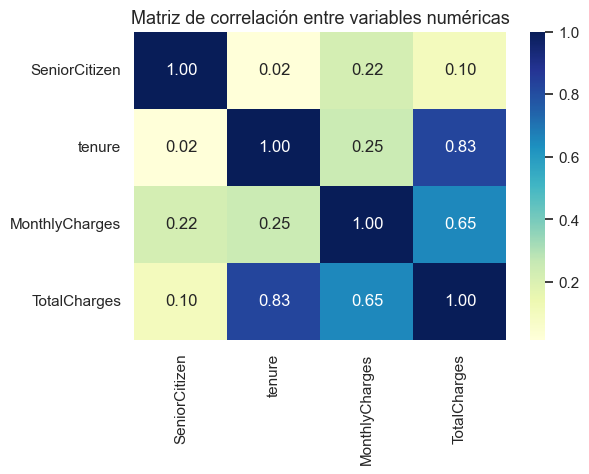

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo variables numéricas
num_df = df.select_dtypes(include=['float64','int64'])

# Matriz de correlación
plt.figure(figsize=(6,4))
sns.heatmap(num_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas", fontsize=13)
plt.show()

### 🧩 Conclusión — Correlación entre variables numéricas

La matriz de correlación evidencia las siguientes relaciones principales:

- Existe una **alta correlación positiva** entre `tenure` y `TotalCharges` (**0.83**), lo cual es lógico:  
  a mayor tiempo como cliente, mayor monto total facturado.
- Se observa una **correlación moderada** entre `MonthlyCharges` y `TotalCharges` (**0.65**),  
  ya que las tarifas mensuales influyen directamente en el total cobrado.
- La variable `SeniorCitizen` muestra **baja correlación** con las demás (<0.25),  
  lo que indica que ser adulto mayor no tiene una relación lineal directa con los cargos o el tiempo de permanencia.
- En general, **no se detectan relaciones redundantes** entre las variables numéricas,  
  por lo que todas podrían conservarse para el modelado sin riesgo de multicolinealidad significativa.

> 📊 **Conclusión:**  
> Las variables `tenure`, `MonthlyCharges` y `TotalCharges` están fuertemente relacionadas entre sí  
> y describen el comportamiento financiero y la permanencia del cliente.  
> Esto sugiere que son **factores clave para el modelo predictivo de churn (abandono de clientes)**.

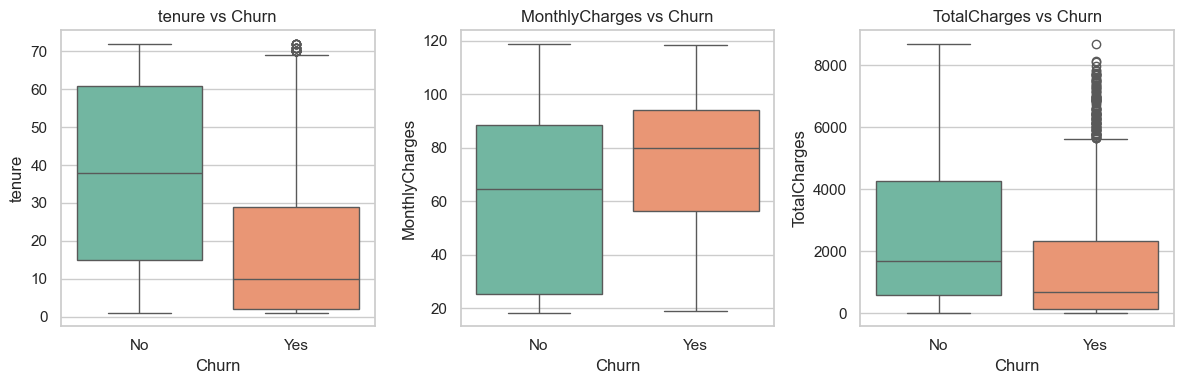

In [201]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

### 📊 Conclusión — Relación entre variables numéricas y `Churn`

Los boxplots permiten visualizar cómo se distribuyen las variables numéricas en función de si el cliente ha abandonado (`Churn = Yes`) o no (`Churn = No`):

- **`tenure` (tiempo como cliente):**  
  Los clientes con menor tiempo de permanencia muestran una mayor proporción de abandono.  
  En cambio, quienes llevan más tiempo tienden a mantenerse activos.

- **`MonthlyCharges` (cargos mensuales):**  
  Los clientes que pagan cargos mensuales más altos presentan una ligera tendencia a darse de baja,  
  posiblemente por sensibilidad al costo o falta de planes con mejor relación costo-beneficio.

- **`TotalCharges` (cargos totales):**  
  Los clientes con menores cargos totales son quienes más abandonan,  
  lo que refuerza la idea de que los clientes nuevos o de bajo gasto tienden a irse antes.

> 💡 **Conclusión general:**  
> El abandono (`Churn`) se asocia principalmente con **clientes nuevos o de bajo gasto**,  
> mientras que los clientes con mayor antigüedad o cargos acumulados tienden a ser más fieles.  
> Esto sugiere que **la retención temprana** y **la gestión de precios** son factores clave para reducir el churn.

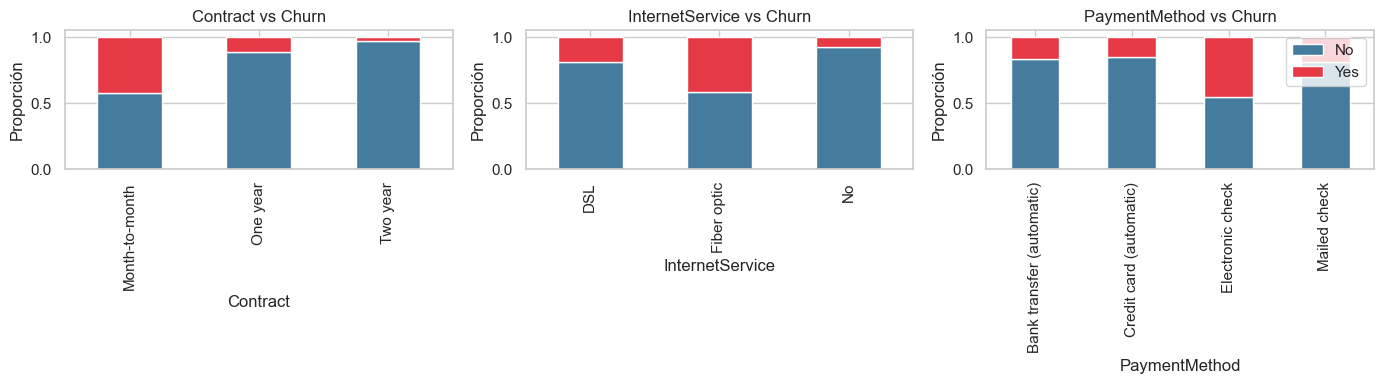

In [202]:
cat_cols = ['Contract','InternetService','PaymentMethod']

plt.figure(figsize=(14,4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    prop = df.groupby([col,'Churn']).size().unstack().apply(lambda x: x/x.sum(), axis=1)
    prop.plot(kind='bar', stacked=True, color=['#457b9d','#e63946'], ax=plt.gca(), legend=False)
    plt.title(f'{col} vs Churn')
    plt.ylabel('Proporción')
plt.legend(['No', 'Yes'], loc='upper right')
plt.tight_layout()
plt.show()

### 📊 Conclusión — Relación entre variables categóricas y `Churn`

Las proporciones por categoría permiten identificar los segmentos de clientes con mayor tendencia al abandono:

- **`Contract` (tipo de contrato):**  
  Los clientes con contrato **"Month-to-month"** presentan la **mayor tasa de churn**,  
  mientras que aquellos con contratos de **uno o dos años** muestran una retención significativamente mayor.  
  Esto sugiere que los compromisos de largo plazo ayudan a reducir la rotación de clientes.

- **`InternetService` (tipo de servicio de internet):**  
  Los usuarios con **"Fiber optic"** registran la **mayor proporción de churn**,  
  posiblemente debido a costos más altos o problemas de servicio.  
  En cambio, los clientes con **DSL o sin servicio de internet** tienen tasas de abandono mucho menores.

- **`PaymentMethod` (método de pago):**  
  Los clientes que pagan mediante **“Electronic check”** son los que más abandonan,  
  mientras que quienes usan **transferencias bancarias automáticas o tarjetas de crédito** presentan menor churn.  
  Esto puede indicar que los métodos de pago automáticos favorecen la permanencia.

> 💡 **Conclusión general:**  
> Las variables **Contract**, **InternetService** y **PaymentMethod** influyen directamente en la probabilidad de abandono.  
> Los contratos cortos, servicios de fibra y pagos manuales están asociados a **mayor riesgo de churn**,  
> mientras que los contratos largos y pagos automáticos fortalecen la **retención del cliente**.